In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab12.ipynb")

# Lab 12: Principal Component Analysis

In this lab assignment, we will walk through an example of using Principal Component Analysis (PCA) on a dataset involving [iris plants](https://en.wikipedia.org/wiki/Iris_plant).


### Due Date

This assignment is due at Saturday, August 7th at 11:59 pm PDT.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

**Collaborators:** *list names here*

### Lab Walkthrough Video

In addition to the lab notebook, we have also released a prerecorded walk-through video of the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the video.

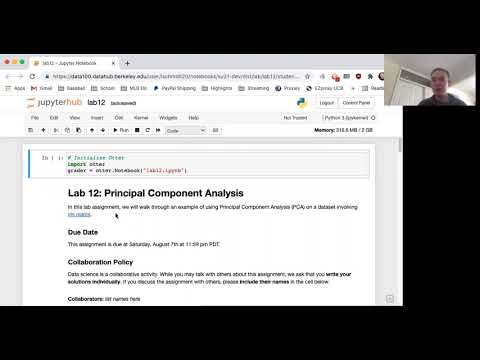

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("DMp3l6Bybz8", list = 'PLQCcNQgUcDfrDRQ9E-Rl6irt2InIWd4Ef', listType = 'playlist')

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To begin, run the following cell to load the dataset into this notebook. 
* `iris_features` will contain a numpy array of 4 attributes for 150 different plants (shape `150 x 4`). 
* `iris_target` will contain the class of each plant. There are 3 classes of plants in the dataset: Iris-Setosa, Iris-Versicolour, and Iris-Virginica. The class names will be stored in `iris_target_names`.
* `iris_feature_names` will be a list of 4 names, one for each attribute in `iris_features`. 

In [4]:
from sklearn.datasets import load_iris
iris_data = load_iris() # Loading the dataset

# Unpacking the data into arrays
iris_features = iris_data['data']
iris_target = iris_data['target']
iris_feature_names = iris_data['feature_names']
iris_target_names = iris_data['target_names']

# Convert iris_target to string labels instead of int labels currently (0, 1, 2) for the classes
iris_target = iris_target_names[iris_target]

Let's explore the data by creating a scatter matrix of our iris features. To do this, we'll create 2D scatter plots for every possible pair of our four features. This should result in six total scatter plots in our scatter matrix with the classes labeled in distinct colors for each plot.

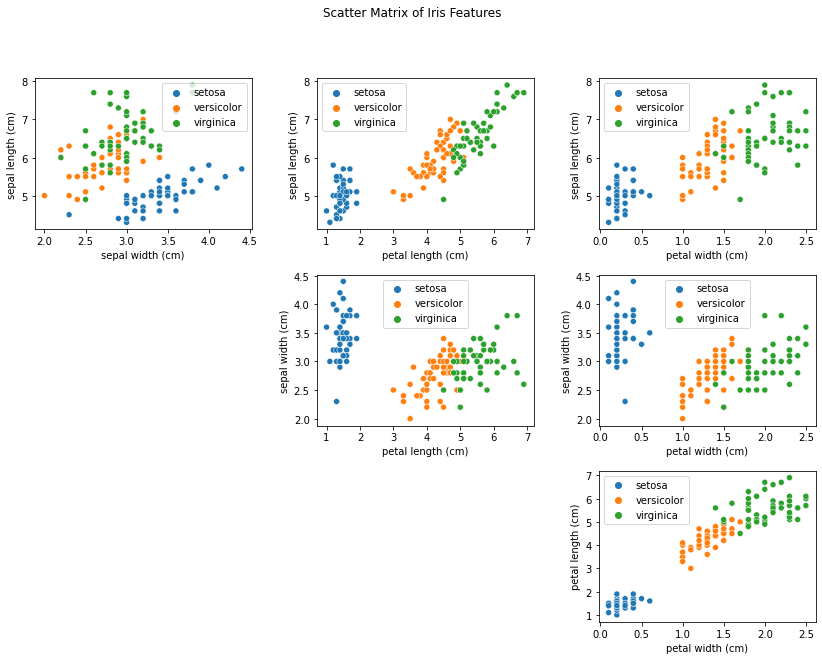

In [5]:
plt.figure(figsize=(14, 10))
plt.suptitle("Scatter Matrix of Iris Features")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(1, 4):
    for j in range(i):
        plt.subplot(3, 3, i+3*j)
        sns.scatterplot(x=iris_features[:, i], y=iris_features[:, j], hue=iris_target)
        plt.xlabel(iris_feature_names[i])
        plt.ylabel(iris_feature_names[j])

## Question 1a

To apply PCA, we will first need to center and scale the data so that the mean of each feature is 0, and the standard deviation of each feature is 1. 

Compute the columnwise mean of `iris_features` in the cell below and store it in `iris_mean`, and compute the columnwise standard deviation of `iris_features` and store it in `iris_std`. Each should be a numpy array of 4 means, 1 for each feature. Then, subtract `iris_mean` from `iris_features` and divide by `iris_std`, and finally, save the result in `features`.

**Hints:** 
* Use `np.mean` or `np.average` to compute `iris_mean`, and pay attention to the `axis` argument.
* If you are confused about how numpy deals with arithmetic operations between arrays of different shapes, see this note about [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for explanations/examples.

<!--
BEGIN QUESTION
name: q1a
-->

In [6]:
iris_mean = np.mean(iris_features, axis = 0)
iris_std = np.std(iris_features, axis = 0)
features = (iris_features - iris_mean) / iris_std
iris_mean, iris_std

(array([5.84333333, 3.05733333, 3.758     , 1.19933333]),
 array([0.82530129, 0.43441097, 1.75940407, 0.75969263]))

In [7]:
grader.check("q1a")

q1a results: All test cases passed!

## Question 1b

As you may recall from lecture, PCA is a specific application of the singular value decomposition (SVD) for matrices. In the following cell, let's use the [`np.linalg.svd`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function to compute the SVD of our `features`. Store the left singular vectors, singular values, and right singular vectors in `u`, `s`, and `vt`, respectively. Note that `vt` corresponds to $V^T$. Set the `full_matrices` argument of `np.linalg.svd` to `False`.

<!--
BEGIN QUESTION
name: q1b
-->

In [8]:
u, s, vt = np.linalg.svd(features, full_matrices = False)
u.shape, s, vt.shape

((150, 4), array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239]), (4, 4))

In [9]:
grader.check("q1b")

q1b results: All test cases passed!

## Question 1c

What can we learn from the singular values in `s`? Formally, we can measure the amount of variance captured by the i'th principal component as:

$\sigma_i^2/N$, where $\sigma_i$ is the singular value of the i'th principal component and $N$ is the total number of data points.

Compute the total variance of our data below by summing the square of each singular value in `s` and dividing the result by the total number of data points. Store the result in the variable `total_variance`.

<!--
BEGIN QUESTION
name: q1c
-->

In [10]:
total_variance = np.sum(s**2) / features.shape[0]
print("total_variance: {:.3f} should approximately equal the sum of the feature variances: {:.3f}"
      .format(total_variance, np.sum(np.var(features, axis=0))))

total_variance: 4.000 should approximately equal the sum of the feature variances: 4.000


In [11]:
grader.check("q1c")

q1c results: All test cases passed!

As you can see, `total_variance` is equal to the sum of the feature variances.

## Question 2a

Let's now use only the first two principal components to see what a 2D version of our iris data looks like.

First, construct the 2D version of the iris data by multiplying our `features` array with the first two right singular vectors in `v`. Because the first two right singular vectors are directions for the first two principal components, this will project the iris data down from a 4D subspace to a 2D subspace.

**Hints:**
* To matrix-multiply two numpy arrays, use `@` or `np.dot`.
* Note that the output of `np.linalg.svd` is `vt` and not `v`: the first two right singular vectors in `v` will be the first two columns of `v`, or the first two rows of `vt` (transposed to be column vectors instead of row vectors). 
* Since we want to obtain a 2D version of our iris dataset, the shape of `iris_2d` should be (150, 2).

<!--
BEGIN QUESTION
name: q2a
-->

In [12]:
iris_2d = features @ vt[:2, :].T
np.sum(iris_2d[:, 0])

-2.2737367544323206e-13

In [13]:
grader.check("q2a")

q2a results: All test cases passed!

Now, run the cell below to create the scatter plot of our 2D version of the iris data, `iris_2d`.

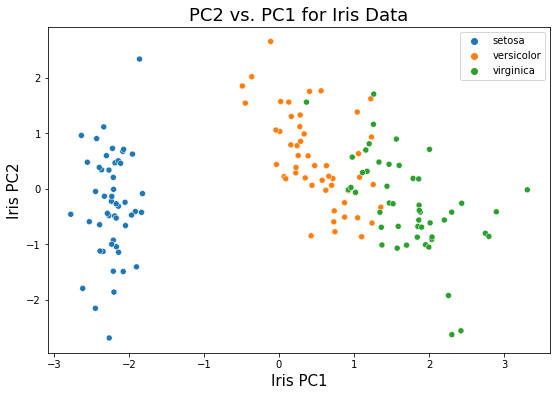

In [14]:
plt.figure(figsize = (9, 6))
plt.title("PC2 vs. PC1 for Iris Data", fontsize = 18)
plt.xlabel("Iris PC1", fontsize = 15)
plt.ylabel("Iris PC2", fontsize = 15)
sns.scatterplot(x = iris_2d[:, 0], y = iris_2d[:, 1], hue = iris_target);

## Question 2b

What do you observe about the plot above? If you were given a point in the subspace defined by PC1 and PC2, how well would you be able to classify the point as one of the three iris types?

<!--
BEGIN QUESTION
name: q2b
-->

_Type your answer here, replacing this text._

## Question 2c

What proportion of the total variance is accounted for when we project the iris data down to two dimensions? Compute this quantity in the cell below by dividing the variance captured by the first two singular values (also known as component scores) in `s` by the `total_variance` you calculated previously. Store the result in `two_dim_variance`.

<!--
BEGIN QUESTION
name: q2c
-->

In [15]:
two_dim_variance = np.sum(s[0:2] ** 2) / np.sum(s**2)
two_dim_variance

0.9581320720000164

In [16]:
grader.check("q2c")

q2c results: All test cases passed!

Most of the variance in the data is explained by the two-dimensional projection!

## Question 3

As a last step, we will create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) to visualize the weight of each principal component. In the cell below, create a scree plot by creating a line plot of the component scores (variance captured by each principal component) vs. the principal component number (1st, 2nd, 3rd, or 4th). Your graph should match the image below:

***Hint***: You may find `plt.xticks()` helpful when formatting your plot axes.

<img src="scree.png" width="400px" />

<!--
BEGIN QUESTION
name: q3
-->

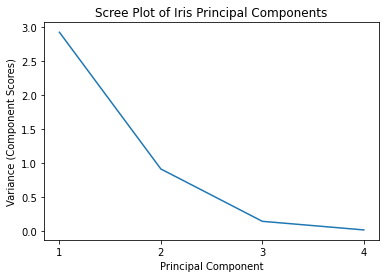

In [17]:
plt.xticks([1, 2, 3, 4])
plt.xlabel("Principal Component")
plt.ylabel("Variance (Component Scores)")
plt.title("Scree Plot of Iris Principal Components")
plt.plot([1, 2, 3, 4] ,s**2/features.shape[0])

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [18]:
grader.check_all()

q1a results: All test cases passed!

q1b results: All test cases passed!

q1c results: All test cases passed!

q2a results: All test cases passed!

q2c results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [19]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)